In [2]:
#Prerequisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import accuracy_score,recall_score,precision_score,auc,confusion_matrix,f1_score,precision_recall_fscore_support,classification_report

## Table of Contents
1. [Data Acquisition](#DA) - Data source
2. [Exploratory Data Analysis](#EDA) - Insights of the key characteristics
3. [Feature Engineering](#FE) - Feature discovery
4. [Modelling](#M) - Model development
5. [Conclusion](#CN)

## 1. Data Acquisition <a class="anchor" id="DA"></a>

Data sets are fetched from reading .csv files.

In [3]:
data=pd.read_csv("bank-additional-full.csv")

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Exploratory Data Analysis <a class="anchor" id="EDA"></a>
### 2.1 Data information
Understanding the given dataset and helps clean up the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.2 Missing values
Detecting Null or NA values in the dataframe in order to avoid bias or the loss of accuracy.

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2.3 Duplicate rows
Detecting duplicate rows in the dataframe in order to avoid bias or the loss of accuracy.

In [7]:
data.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(41176, 21)

### 2.4 Categorical Variables
Finding categorical variables that need to be one-hot encoded in the future.

In [10]:
categorical=[]

#Finding character variables in the data frame
for i in data.columns:
    if data[i].dtype=='O':
        categorical.append(i)

In [11]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### 2.5 Data balance
Finding categorical variables that need to be one-hot encoded in the future.

In [12]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

<AxesSubplot:>

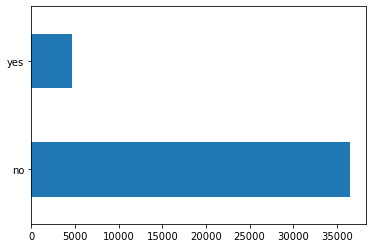

In [13]:
data['y'].value_counts().plot(kind='barh')

#### 2.5.1 Undersampling

In [14]:
# Class count
count_class_0, count_class_1 = data['y'].value_counts()

# Divide by class
data_class_0 = data[data['y'] == 'no']
data_class_1 = data[data['y'] == 'yes']

In [15]:
data_class_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [16]:
data_class_0_under = data_class_0.sample(n=count_class_1)
data_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_under['y'].value_counts()

no     4639
yes    4639
Name: y, dtype: int64

<AxesSubplot:>

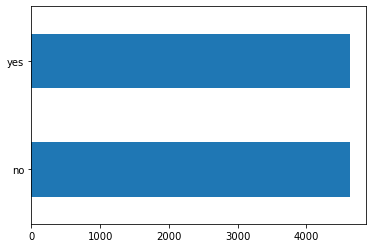

In [19]:
data_under['y'].value_counts().plot(kind='barh')

In [17]:
data_under1=data_under
data_under2=data_under
data_under3=data_under

#### 2.5.2 Oversampling

In [20]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

data_over['y'].value_counts()

no     36537
yes    36537
Name: y, dtype: int64

<AxesSubplot:>

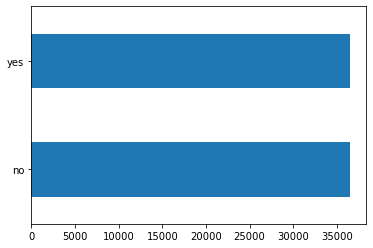

In [21]:
data_over['y'].value_counts().plot(kind='barh')

In [22]:
data_over1=data_over
data_over2=data_over
data_over3=data_over

### 2.6 Outlier removal
Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.

One of the simplest methods for detecting outliers is box plots. A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles. 

In [23]:
data_under.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000
mean,40.444061,389.321729,2.310843,887.147446,0.311058,-0.487648,93.480568,-40.150550,2.974383,5135.829963
std,12.104413,361.714506,2.256428,313.974019,0.695563,1.728393,0.633671,5.349759,1.892718,87.126506
min,17.000000,3.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,266.500000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,528.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
data_over.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000
mean,40.420382,385.850754,2.338205,889.149985,0.311109,-0.488538,93.480757,-40.182909,2.969831,5135.666459
std,12.066543,358.058280,2.358139,311.491936,0.695464,1.722497,0.632983,5.348589,1.890968,87.102922
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,523.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The standard deviation indicates the dispersion of the data relative to its mean and is calculated as the square root of the variance.

From above results, we can see that 'duration','pdays' and 'nr.employed' have high std. However, 'pdays' aligns with uniform distribution and can not be dealt with quartile removal. In this way, we decide to remove outliers for the other features first by drawing box plot.

Text(0.5, 1.0, 'Distribution of pdays')

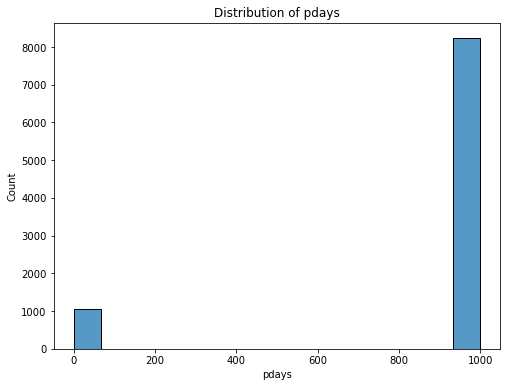

In [25]:
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xlim(0,)
sns.histplot(data_under['pdays'],ax=ax).set_title('Distribution of pdays')

'duration' of undersample

Text(0.5, 0, 'feature')

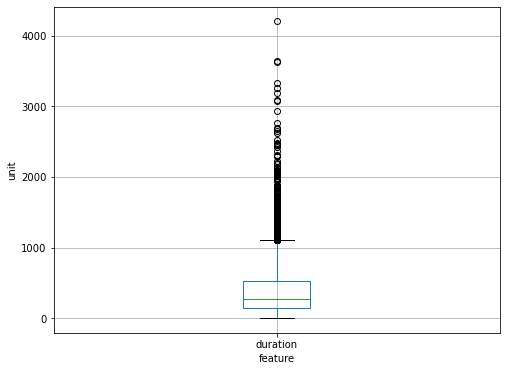

In [26]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [27]:
num1=data_under1.shape[0]
Q1 = data_under1['duration'].quantile(0.25)
Q3 = data_under1['duration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['duration'] >= Q1 - 1.5 * IQR) & (data_under1['duration'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

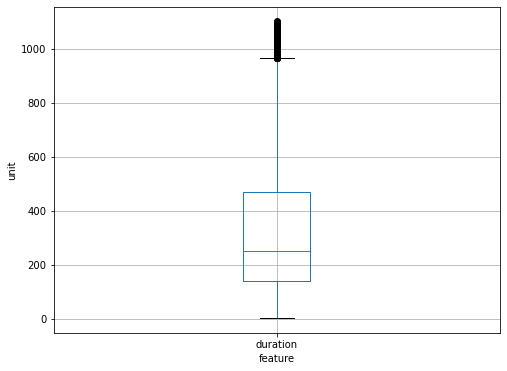

In [28]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

'nr.employed' of undersample

Text(0.5, 0, 'feature')

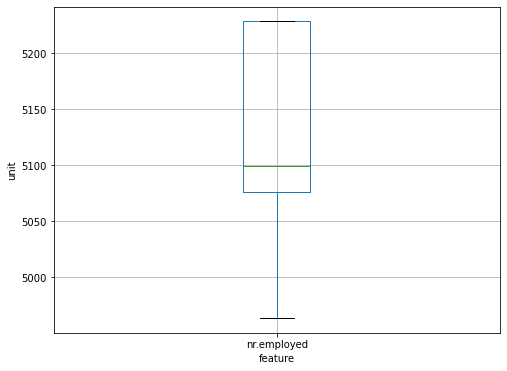

In [29]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [30]:
num1=data_under1.shape[0]
Q1 = data_under1['nr.employed'].quantile(0.25)
Q3 = data_under1['nr.employed'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['nr.employed'] >= Q1 - 1.5 * IQR) & (data_under1['nr.employed'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

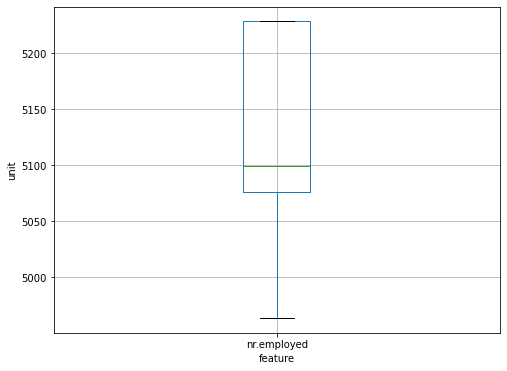

In [31]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [32]:
data_under1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000
mean,40.467960,332.927413,2.298968,882.987297,0.320290,-0.521096,93.473965,-40.119372,2.938154,5134.109357
std,12.186426,253.843750,2.269299,319.006970,0.706264,1.730655,0.636988,5.387432,1.893741,87.353165
min,17.000000,3.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,140.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.206000,5076.200000
50%,38.000000,252.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,1.799000,5099.100000
75%,48.000000,470.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,1101.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [33]:
data_under1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20328,54,self-employed,married,basic.9y,no,no,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
21431,46,technician,married,professional.course,unknown,no,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
14697,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
37519,44,unemployed,married,high.school,no,yes,no,telephone,aug,thu,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no
20770,51,management,married,high.school,unknown,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 3. Feature Engineering <a class="anchor" id="FE"></a>

A variaty of pre-processing steps on dealing with features to improve the performance of models.

### 3.1 Heatmap
Those VIFs who are greater than 10 would be considered as high multicollinearity features, thus should be removed.

C:\Users\intwe\AppData\Local\Temp\ipykernel_12892\2744395354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot:>

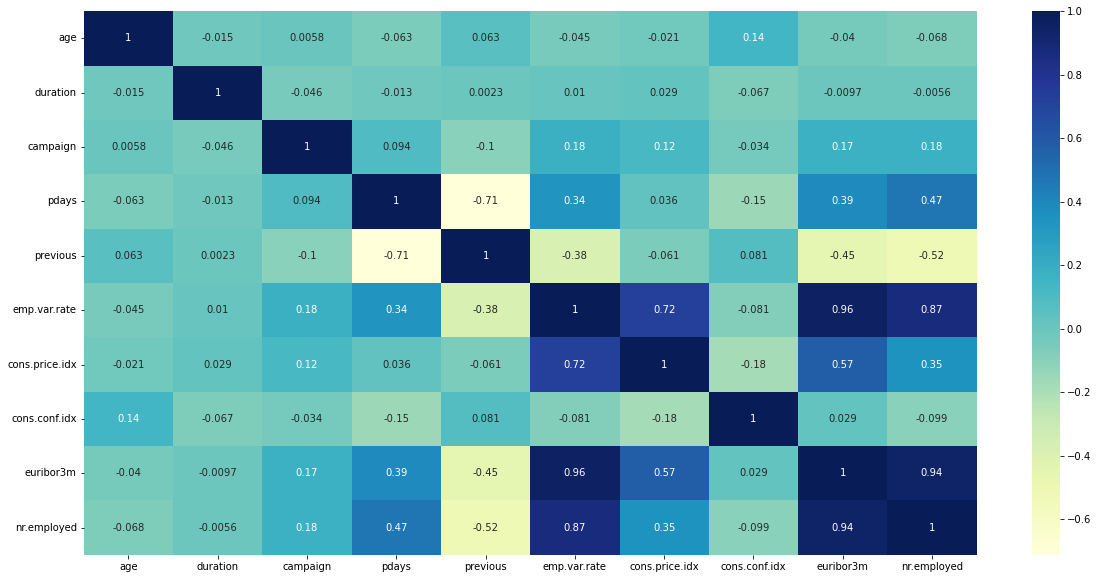

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
X = data_under2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
result=calc_vif(X)
result

,variables,VIF
0,age,12.474371
1,duration,2.179572
2,campaign,2.135383
3,pdays,19.151987
4,previous,2.683880
5,emp.var.rate,28.050470
6,cons.price.idx,16684.960357
7,cons.conf.idx,85.965328
8,euribor3m,138.661256
9,nr.employed,19934.395173


In [37]:
data_under3=data_under3[[str(i) for i in result[result['VIF']<10]['variables']]]
data_under3

,duration,campaign,previous
20328,48,5,0
21431,235,2,0
14697,498,5,0
37519,99,1,0
20770,158,1,0
...,...,...,...
41174,208,1,6
41178,483,2,3
41181,281,1,0
41183,334,1,0


### 3.2 Multicollinearity function
Using Variable Inflation Factor (VIF), setting it with a default threshold of 5.0. Those features that are greater than 5.0 would be considered high multicollinearity and will be removed.

In [38]:
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def removeMultiColl(data, vif_threshold = 5.0):
    for i in data.columns:
        if data[i].nunique() == 1:
            print(f"Dropping {i} due to just 1 unique value")
            data.drop(columns = i, inplace = True)
    drop = True
    col_list = list(data.columns)
    while drop == True:
        drop = False
        vif_list = Parallel(n_jobs = -1, verbose = 5)(delayed(variance_inflation_factor)(data[col_list].values, i) for i in range(data[col_list].shape[1]))
        max_index = vif_list.index(max(vif_list))
        if vif_list[max_index] > vif_threshold:
            print(f"Dropping column : {col_list[max_index]} at index - {max_index}")
            del col_list[max_index]
            drop = True
    print("Remaining columns :\n", list(data[col_list].columns))
    return data[col_list]

In [39]:
data_test=removeMultiColl(X)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s r

Dropping column : nr.employed at index - 9
Dropping column : cons.price.idx at index - 6
Dropping column : cons.conf.idx at index - 6
Dropping column : euribor3m at index - 6
Dropping column : age at index - 0
Remaining columns :
 ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [40]:
data_test

,duration,campaign,pdays,previous,emp.var.rate
20328,48,5,999,0,1.4
21431,235,2,999,0,1.4
14697,498,5,999,0,1.4
37519,99,1,999,0,-2.9
20770,158,1,999,0,1.4
...,...,...,...,...,...
41174,208,1,1,6,-1.1
41178,483,2,6,3,-1.1
41181,281,1,999,0,-1.1
41183,334,1,999,0,-1.1


In [41]:
data_undersample1=data_under[categorical].join(data_under3)

In [42]:
data_undersample1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,previous
20328,self-employed,married,basic.9y,no,no,no,cellular,aug,mon,nonexistent,no,48,5,0
21431,technician,married,professional.course,unknown,no,no,cellular,aug,tue,nonexistent,no,235,2,0
14697,admin.,single,high.school,no,yes,no,cellular,jul,tue,nonexistent,no,498,5,0
37519,unemployed,married,high.school,no,yes,no,telephone,aug,thu,nonexistent,no,99,1,0
20770,management,married,high.school,unknown,no,no,cellular,aug,wed,nonexistent,no,158,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,6
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,3
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,0
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,0


In [43]:
data_undersample2=data_under[categorical].join(data_test)

In [44]:
data_undersample2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,pdays,previous,emp.var.rate
20328,self-employed,married,basic.9y,no,no,no,cellular,aug,mon,nonexistent,no,48,5,999,0,1.4
21431,technician,married,professional.course,unknown,no,no,cellular,aug,tue,nonexistent,no,235,2,999,0,1.4
14697,admin.,single,high.school,no,yes,no,cellular,jul,tue,nonexistent,no,498,5,999,0,1.4
37519,unemployed,married,high.school,no,yes,no,telephone,aug,thu,nonexistent,no,99,1,999,0,-2.9
20770,management,married,high.school,unknown,no,no,cellular,aug,wed,nonexistent,no,158,1,999,0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,1,6,-1.1
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,6,3,-1.1
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,999,0,-1.1
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,999,0,-1.1


## 4. Modelling <a class="anchor" id="M"></a>

We try out Logistic Regression, SVM, Random Forest, Xgboost algorithms to compare the accuracy performance.

### 4.1 Data with all features
#### 4.1.1 Logistic Regression

In [45]:
data_under4=data_under

In [46]:
data_under4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20328,54,self-employed,married,basic.9y,no,no,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
21431,46,technician,married,professional.course,unknown,no,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
14697,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
37519,44,unemployed,married,high.school,no,yes,no,telephone,aug,thu,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no
20770,51,management,married,high.school,unknown,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [47]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_under4[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_under4=data_under4.drop(columns=i)
    data_under4=data_under4.join(one_hot)

In [48]:
data_under4

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
20328,54,48,5,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,1,0,0,0,1,1
21431,46,235,2,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,0,1,0,1,1
14697,33,498,5,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,0,1,0,1,1
37519,44,99,1,999,0,-2.9,92.201,-31.4,0.873,5076.2,...,0,0,0,0,0,1,0,0,1,1
20770,51,158,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,208,1,1,6,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41178,62,483,2,6,3,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41181,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0


In [49]:
#Input of data
X=data_under4.drop(columns=['y_no'])

#Output of data
y=data_under4['y_no']

In [50]:
#Data normalization
Scaler=StandardScaler()
X_=Scaler.fit_transform(X)

In [51]:
#75% of training and 25% of testing
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.25,random_state=0)

In [52]:
#Before normalization()
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
lr= LogisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train,y_train))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test,y_pred))



Training Accuracy of LogisticRegression :  0.8712273641851107
Testing Accuracy of LogisticRegression :  0.8646551724137931


In [54]:
importance = lr.coef_[0]
#print(importance)
# summarize feature importance
for i,v in zip(data_under4.columns,importance):
    print('Feature: %s, Score: %.5f' % (i,v))

Feature: age, Score: 0.02253
Feature: duration, Score: -2.50982
Feature: campaign, Score: 0.07271
Feature: pdays, Score: 0.27892
Feature: previous, Score: -0.00234
Feature: emp.var.rate, Score: 3.21383
Feature: cons.price.idx, Score: -1.18112
Feature: cons.conf.idx, Score: 0.00559
Feature: euribor3m, Score: -1.04985
Feature: nr.employed, Score: -0.01192
Feature: job_admin., Score: 0.38304
Feature: job_blue-collar, Score: 0.45719
Feature: job_entrepreneur, Score: 0.15361
Feature: job_housemaid, Score: 0.11391
Feature: job_management, Score: 0.24819
Feature: job_retired, Score: 0.05607
Feature: job_self-employed, Score: 0.22104
Feature: job_services, Score: 0.29529
Feature: job_student, Score: 0.06629
Feature: job_technician, Score: 0.32447
Feature: job_unemployed, Score: 0.09988
Feature: marital_divorced, Score: 0.02803
Feature: marital_married, Score: 0.07568
Feature: marital_single, Score: 0.04105
Feature: education_basic.4y, Score: -0.04136
Feature: education_basic.6y, Score: -0.0116

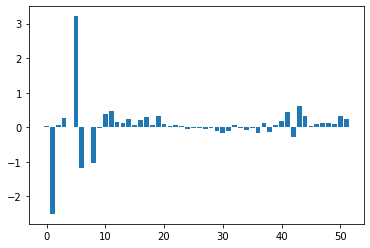

In [55]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### 4.1.2 SVM

In [56]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

print("Training Accuracy of SVM : ",svm.score(X_train,y_train))
print("Testing Accuracy of SVM : ",accuracy_score(y_test,y_pred_svm))


Training Accuracy of SVM :  0.8751077895947111
Testing Accuracy of SVM :  0.8676724137931034


#### 4.1.3 Random Forest

In [92]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [93]:
rd_classifier_train_preds =rd_classifier.predict(X_train)
rd_classifier_preds=rd_classifier.predict(X_test)

precision_recall_fscore_support(y_train,rd_classifier_train_preds)
confusion_matrix(y_train,rd_classifier_train_preds)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   0, 3470]], dtype=int64)

In [94]:
print(accuracy_score(y_test,rd_classifier_preds))
print(recall_score(y_test,rd_classifier_preds))
print(precision_score(y_test,rd_classifier_preds))
print(f1_score(y_test,rd_classifier_preds))

0.881896551724138
0.8357570573139436
0.9225684608120869
0.8770197486535009


In [95]:
print(classification_report(y_test,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1151
           1       0.92      0.84      0.88      1169

    accuracy                           0.88      2320
   macro avg       0.89      0.88      0.88      2320
weighted avg       0.89      0.88      0.88      2320



In [96]:
#Important features in the RF model
imp_dict={'Feature':X_train1.columns.to_list(),'Importance':rd_classifier.feature_importances_}
df_imp_dict=pd.DataFrame(imp_dict).sort_values(by='Importance',ascending=False).set_index('Feature')

In [97]:
df_imp_dict

,Importance
Feature,
duration,0.362835
euribor3m,0.103422
nr.employed,0.069402
age,0.056910
emp.var.rate,0.044756
cons.price.idx,0.029128
cons.conf.idx,0.028582
campaign,0.028091
pdays,0.022002


#### 4.1.4 Xgboost

In [147]:
import xgboost as xgb

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)
num_boost_round = 999

params={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.53414
[1]	Test-logloss:0.44478
[2]	Test-logloss:0.39203
[3]	Test-logloss:0.35783
[4]	Test-logloss:0.33420
[5]	Test-logloss:0.31905
[6]	Test-logloss:0.30985
[7]	Test-logloss:0.30244
[8]	Test-logloss:0.30003
[9]	Test-logloss:0.29658
[10]	Test-logloss:0.29285
[11]	Test-logloss:0.29079
[12]	Test-logloss:0.29100
[13]	Test-logloss:0.29088
[14]	Test-logloss:0.28971
[15]	Test-logloss:0.29135
[16]	Test-logloss:0.29026
[17]	Test-logloss:0.29075
[18]	Test-logloss:0.29181
[19]	Test-logloss:0.29174
[20]	Test-logloss:0.29097
[21]	Test-logloss:0.29041
[22]	Test-logloss:0.29003
[23]	Test-logloss:0.29106


In [148]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.11267569845558889 for 12 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.11051928654651826 for 12 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.11181280315988662 for 15 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.11325010122544768 for 12 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.11210026277299885 for 12 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.11166902170769397 for 16 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.1116684019600552 for 17 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.11310570002561622 for 12 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.11152544683804755 for 17 rounds
Best params: 9, 6, Error: 0.11051928654651826


In [109]:
params['max_depth'] = 9
params['min_child_weight'] = 6

In [111]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.11051928654651826 for 12 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.114400352842989 for 23 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.11195637802953304 for 14 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.11310600989943562 for 14 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.11310683622962063 for 21 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.11468760587355495 for 11 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.11238813555120356 for 21 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.11368320153366882 for 19 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.11339398596891348 for 21 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.1121012956857301 for 14 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.11310776585107878 for 17 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.11281978978160094 for 18 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.11339439913400598 for

In [112]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [114]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 8 s
Wall time: 1.05 s
	Error 0.11051928654651826 for 12 rounds

CV with eta=0.2
CPU times: total: 9.34 s
Wall time: 1.24 s
	Error 0.11080591982944546 for 13 rounds

CV with eta=0.1
CPU times: total: 12.5 s
Wall time: 1.61 s
	Error 0.1139674591173141 for 20 rounds

CV with eta=0.05
CPU times: total: 17.1 s
Wall time: 2.22 s
	Error 0.1145434112562698 for 32 rounds

CV with eta=0.01
CPU times: total: 38.4 s
Wall time: 5.45 s
	Error 0.11842396109637487 for 87 rounds

CV with eta=0.005
CPU times: total: 27 s
Wall time: 3.98 s
	Error 0.12101161407075038 for 57 rounds

Best params: 0.3, Error: 0.11051928654651826


In [115]:
params['eta'] = .3

In [140]:
params

{'max_depth': 9,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'binary:logistic'}

In [143]:
xgb = xgb.XGBClassifier(max_depth=9,
 min_child_weight= 5,
 eta=0.3,
 subsample= 1,
 colsample_bytree= 1)
xgb.fit(X_train,y_train)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [144]:
print(xgb.score(X_test,y_test))
print(xgb.score(X_train,y_train))

0.875
0.9810290313308422


In [145]:
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1151
           1       0.90      0.84      0.87      1169

    accuracy                           0.88      2320
   macro avg       0.88      0.88      0.87      2320
weighted avg       0.88      0.88      0.87      2320



### 4.2 Data with multicollinearity removal through the heatmap
#### 4.2.1 Logistic Regression

In [57]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_undersample1[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_undersample1=data_undersample1.drop(columns=i)
    data_undersample1=data_undersample1.join(one_hot)

In [58]:
data_undersample1

,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
20328,48,5,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
21431,235,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
14697,498,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
37519,99,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
20770,158,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,208,1,6,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
41178,483,2,3,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
41181,281,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
41183,334,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [59]:
#Input of data
X_under1=data_undersample1.drop(columns=['y_no'])

#Output of data
y_under1=data_undersample1['y_no']

In [60]:
#Data normalization
Scaler=StandardScaler()
X_under1_=Scaler.fit_transform(X_under1)

In [61]:
#75% of training and 25% of testing
X_train_under1,X_test_under1,y_train_under1,y_test_under1=train_test_split(X_under1_,y_under1,test_size=0.25,random_state=0)

In [65]:
lr= LogisticRegression()

lr.fit(X_train_under1,y_train_under1)
y_pred_under1 = lr.predict(X_test_under1)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_under1,y_train_under1))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test_under1,y_pred_under1))


Training Accuracy of LogisticRegression :  0.8427709111813739
Testing Accuracy of LogisticRegression :  0.8293103448275863


#### 4.2.2 SVM

In [66]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

svm.fit(X_train_under1,y_train_under1)
y_pred_svm_under1 = svm.predict(X_test_under1)

print("Training Accuracy of SVM : ",svm.score(X_train_under1,y_train_under1))
print("Testing Accuracy of SVM : ",accuracy_score(y_test_under1,y_pred_svm_under1))

Training Accuracy of SVM :  0.8462201782121299
Testing Accuracy of SVM :  0.8284482758620689


#### 4.2.3 Random Forest

In [62]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train_under1,y_train_under1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [63]:
rd_classifier_train_preds =rd_classifier.predict(X_train_under1)
rd_classifier_preds=rd_classifier.predict(X_test_under1)

precision_recall_fscore_support(y_train_under1,rd_classifier_train_preds)
confusion_matrix(y_train_under1,rd_classifier_train_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   0, 3470]], dtype=int64)

In [64]:
print(classification_report(y_test_under1,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1151
           1       0.88      0.80      0.84      1169

    accuracy                           0.85      2320
   macro avg       0.85      0.85      0.85      2320
weighted avg       0.85      0.85      0.85      2320



#### 4.2.4 Xgboost

In [67]:
import xgboost as xgb

dtrain_under1=xgb.DMatrix(X_train_under1,label=y_train_under1)
dtest_under1=xgb.DMatrix(X_test_under1,label=y_test_under1)
num_boost_round = 999

params_under1={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params_under1,
    dtrain_under1,
    num_boost_round=num_boost_round,
    evals=[(dtest_under1, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.56980
[1]	Test-logloss:0.50452
[2]	Test-logloss:0.46383
[3]	Test-logloss:0.43571
[4]	Test-logloss:0.41914
[5]	Test-logloss:0.40617
[6]	Test-logloss:0.39811
[7]	Test-logloss:0.39246
[8]	Test-logloss:0.38735
[9]	Test-logloss:0.38159
[10]	Test-logloss:0.37856
[11]	Test-logloss:0.37564
[12]	Test-logloss:0.37425
[13]	Test-logloss:0.37298
[14]	Test-logloss:0.36889
[15]	Test-logloss:0.36914
[16]	Test-logloss:0.36753
[17]	Test-logloss:0.36711
[18]	Test-logloss:0.36549
[19]	Test-logloss:0.36431
[20]	Test-logloss:0.36496
[21]	Test-logloss:0.36479
[22]	Test-logloss:0.36503
[23]	Test-logloss:0.36614
[24]	Test-logloss:0.36572
[25]	Test-logloss:0.36544
[26]	Test-logloss:0.36401
[27]	Test-logloss:0.36419
[28]	Test-logloss:0.36537
[29]	Test-logloss:0.36679
[30]	Test-logloss:0.36627
[31]	Test-logloss:0.36708
[32]	Test-logloss:0.36758
[33]	Test-logloss:0.36750
[34]	Test-logloss:0.36771
[35]	Test-logloss:0.36809
[36]	Test-logloss:0.36827


In [68]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params_under1['max_depth'] = max_depth
    params_under1['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params_under1,
        dtrain_under1,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.13998332878851732 for 17 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.1409886627498616 for 23 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.14213912094994918 for 30 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.13912033020154194 for 14 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.1418509382979251 for 24 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.14084570762785392 for 18 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.13897654874934925 for 14 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.14084581091912707 for 19 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.13868991546642206 for 14 rounds
Best params: 11, 7, Error: 0.13868991546642206


In [69]:
params_under1['max_depth'] = 11
params_under1['min_child_weight'] = 7

In [70]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params_under1['subsample'] = subsample
    params_under1['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params_under1,
        dtrain_under1,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.13868991546642206 for 14 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.14127715527570506 for 13 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.13969524942776634 for 14 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.14113265078460052 for 15 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.1417086029235562 for 19 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.13854510110149815 for 21 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.13840286901840237 for 13 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.14127736185825132 for 29 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.14142104001917086 for 21 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.14113285736714676 for 13 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.14386418850244181 for 18 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.14142104001917088 for 30 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.1431446614938397 fo

In [71]:
params_under1['subsample'] = 0.9
params_under1['colsample_bytree'] = 0.8

In [72]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params_under1['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params_under1,dtrain_under1,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 8.7 s
Wall time: 1.19 s
	Error 0.13840286901840237 for 13 rounds

CV with eta=0.2
CPU times: total: 12.2 s
Wall time: 1.75 s
	Error 0.14055866117983423 for 19 rounds

CV with eta=0.1
CPU times: total: 14.8 s
Wall time: 2.04 s
	Error 0.14027099498417578 for 25 rounds

CV with eta=0.05
CPU times: total: 35.3 s
Wall time: 5.01 s
	Error 0.13725313385722665 for 76 rounds

CV with eta=0.01
CPU times: total: 9.53 s
Wall time: 1.29 s
	Error 0.1484641620598759 for 11 rounds

CV with eta=0.005
CPU times: total: 9.22 s
Wall time: 1.33 s
	Error 0.14774556467273192 for 11 rounds

Best params: 0.05, Error: 0.13725313385722665


In [73]:
params_under1['eta'] = .05

In [74]:
params_under1

{'max_depth': 11,
 'min_child_weight': 7,
 'eta': 0.05,
 'subsample': 0.9,
 'colsample_bytree': 0.8,
 'objective': 'binary:logistic'}

In [75]:
xgb = xgb.XGBClassifier(max_depth=11,
 min_child_weight= 7,
 eta=0.05,
 subsample= 0.9,
 colsample_bytree= 0.8)
xgb.fit(X_train_under1,y_train_under1)

#calculate and print scores for the model
y_train_preds_under1 = xgb.predict(X_train_under1)
y_test_preds_under1 = xgb.predict(X_test_under1)

In [76]:
print(xgb.score(X_test_under1,y_test_under1))
print(xgb.score(X_train_under1,y_train_under1))

0.8491379310344828
0.8953722334004024


## 5. Conclusion <a class="anchor" id="CN"></a>